Essential Purpose:
Skills tested:
Using Pandas to access and explore the dataset.
Using Pandas to cleanse columns to choose features
Using Scikit-Learn to preprocess the data before training.
Using the decision tree classifier and random forest classifier in classifying and testing the data.
Description
Medical appointments are time commitments doctors make with their patients. However, some people do not show up (for different reasons), which causes lost time and money for the doctor. It is time for you to build models that predict whether the next appointment is a show or no show!
License: the dataset is CC4.0: BY-NC-SA and it is publicly available online.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.
Expected Output
By the end of this mini project, you will need to deliver within your code:
Multiple accuracy measures resembling different criteria used for training your decision tree classifiers.
Multiple accuracy measures resembling different number of estimators used for your random forest classifiers.
One printed confusion matrix for the best model.
You are expected to write around 35 lines of code to complete this project.

# Download the Dataset
Download the dataset from the following link:
https://www.kaggle.com/joniarroba/noshowappointments

# Reading the Dataset
Read the dataset into the Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd 
df=pd.read_csv('KaggleV2-May-2016.csv')
df.dropna
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.shape

(110527, 14)

In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
df["No-show"] = LabelEncoder().fit_transform(df["No-show"])

<function matplotlib.pyplot.bar_label(container, labels=None, *, fmt='%g', label_type='edge', padding=0, **kwargs)>

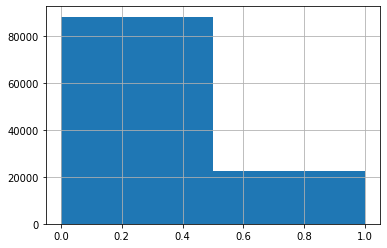

In [33]:
import matplotlib.pyplot as plt
df["No-show"].hist(bins=2)

In [39]:
df.groupby(["No-show"]).count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,,,,,
0,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
1,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


<AxesSubplot:>

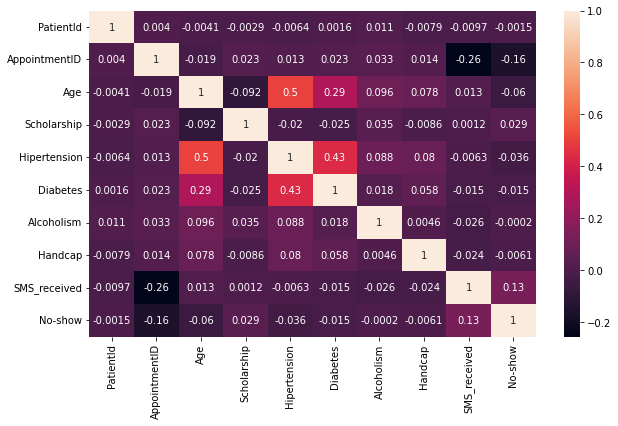

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [6]:
#sns.pairplot(df, hue="No-show")

variables with highest correlation to "No-show": "SMS_received", "Age", "Hipertension", "Scholarship", "Diabetes", "

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


numerical features - age 
binary features - scholarship, hipertension, diabetes, alcoholism, handicap, sms_received
gender - need to encode 


# Feature Extraction
Extract the following features:
Gender
Age
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
Note: you may see that some datasets names are not written using proper spelling. It is related to the dataset, for example:
Hipertension=Hypertension
Handcap=Handicap

In [8]:
nominal = df[['Age']]

categorical = df[['Gender', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]


# Preprocessing
Perform any needed preprocessing of the chosen features, including:
scaling.
Encoding, and
dealing with NaN values.
Hint: use only the preprocessing steps you believe are useful.

In [9]:
#encode "gender"
#check for NaN

pd.unique(df.Gender)

array(['F', 'M'], dtype=object)

In [10]:
categorical = pd.get_dummies(categorical)
categorical

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M
0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,1,1,0
110523,0,0,0,0,0,1,1,0
110524,0,0,0,0,0,1,1,0
110525,0,0,0,0,0,1,1,0


In [11]:
appointments = pd.concat([nominal, categorical], axis = 1)
appointments

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gender_F,Gender_M
0,62,0,1,0,0,0,0,1,0
1,56,0,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1,0
3,8,0,0,0,0,0,0,1,0
4,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,1,0
110523,51,0,0,0,0,0,1,1,0
110524,21,0,0,0,0,0,1,1,0
110525,38,0,0,0,0,0,1,1,0


In [12]:
y = df["No-show"].values
x_columns = len(appointments.columns)
x = appointments.iloc[:,0:x_columns].values

# Splitting the Data
Split your data as follows:
80% training set
10% validation set
10% test set

In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) 

In [15]:
#check to make sure it's split correctly 
print(len(X_train), len(X_test), len(X_validate))

88421 11053 11053


# Training Tree-based Classifiers
Use a decision tree classifier model to train your data.
Choose the best criterion for the decision tree algorithm by trying different values and validating performance on the validation set.
Note: choosing the best criterion is an example of hyper-parameter tuning.
Classification Metrics
Print the accuracy score of your final classifier.
Print the confusion matrix.

In [16]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy')
DTC.fit(X_train, y_train)

#when criterion = entropy, recall score = 0.802
#when criterion = gini, recall score = 0.802
# leaving setting at entropy 


DecisionTreeClassifier(criterion='entropy')

In [17]:
y_pred = DTC.predict(X_test)

In [18]:
#print the accuracy score of your final classifier 
result = DTC.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.7957115715190446


In [19]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix

predictions = DTC.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[8761   72]
 [2186   34]]


In [20]:
# 2186 false negative, 72 false positive 
# true positive = 8761, true negative = 34

In [21]:
from sklearn.metrics import recall_score
score = recall_score(y_test, y_pred,  average='weighted')
print('recall score: '+ str(recall_score(y_test, y_pred,  average='weighted')))

recall score: 0.8019542205735999


# Random Forest
Repeat step 6.
Increase/decrease the number of estimators in random forest and comment on the difference of the classification metrics.

In [22]:
from sklearn.ensemble import RandomForestClassifier 

In [23]:
scores=[]
n_estimators=range(1,30)

for i in n_estimators:
    rfc = RandomForestClassifier(n_estimators = i, criterion="entropy").fit(X_train, y_train)
    results = rfc.score(X_test, y_test)
    scores.append(results)
    
print(scores)


[0.7978829277119334, 0.8009590156518592, 0.8000542839048222, 0.7996923912060074, 0.8010494888265629, 0.8016828010494889, 0.8012304351759704, 0.8018637473988962, 0.8014113815253777, 0.8007780693024519, 0.8011399620012666, 0.8018637473988962, 0.8015018547000814, 0.8014113815253777, 0.8014113815253777, 0.8015923278747851, 0.8015923278747851, 0.8015018547000814, 0.801320908350674, 0.8015923278747851, 0.8014113815253777, 0.8011399620012666, 0.8015923278747851, 0.801320908350674, 0.8011399620012666, 0.8015018547000814, 0.8015018547000814, 0.8021351669230073, 0.8011399620012666]


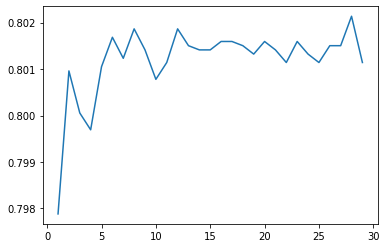

In [24]:
plt.plot(n_estimators, scores)

In [25]:
from sklearn.ensemble import RandomForestClassifier 
RFC = RandomForestClassifier(n_estimators=14, criterion="entropy")
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=14)

In [26]:
y_pred = RFC.predict(X_test)

In [27]:
#print the accuracy score of your final classifier 
result = RFC.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.7941735275490817


In [28]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix

predictions = RFC.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[8740   93]
 [2182   38]]


when comparing the confusion matrix for Decision tree classifier and random forest classifier the difference is very small. 
Confusion Matrix: 
 [[8760   73]
 [2186   34]]
 
 Decision tree classifier performed slightly better for true positives but the accuracy was within 1%.  

In [29]:
# false negative = 2178, false positive= 106 

In [30]:
from sklearn.metrics import recall_score
score = recall_score(y_test, y_pred,  average='weighted')
print('recall score: '+ str(recall_score(y_test, y_pred,  average='weighted')))

recall score: 0.8010494888265629


In [31]:
# decision tree classifier 
# false negative = 2186, false positive = 72 
# true positive = 8761, true negative = 34

# Random forest classifier 
# false negative = 2178, false positive= 106 
# true positive = 8727, true negative = 106 

# random forest was more likely to result in false positives, decision tree was more likely to result in false negatives 
# random forest resulted in more true negatives and decision tree was more likely to result in true positives 

# the application and risks will determine which method is better to choose. 